In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from scipy.stats import kruskal

In [2]:
#1. Understanding the dataset

In [3]:
cwd = os.getcwd()
dataset_dir = os.path.join(cwd,'Dataset')
dataset_path = os.path.join(dataset_dir,'311_Service_Requests_from_2010_to_Present.csv')

In [4]:
#1.1 Import the dataset

In [5]:
dataset = pd.read_csv(dataset_path, low_memory=False)

In [6]:
#1.2 Visualize the dataset

In [7]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [8]:
dataset.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [9]:
#1.3 Print the columns of the DataFrame

In [10]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [12]:
dataset.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [13]:
#1.4 Identify shape of the dataset

In [14]:
dataset.shape

(364558, 53)

In [15]:
#1.5 Identify the variables with null values

In [16]:
dataset.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [17]:
#2. Perform basic data exploratory analysis

In [18]:
graph_dir = os.path.join(cwd,'Graph')

In [19]:
#2.1  Draw a frequency plot to show the number of null values in each column of the DataFrame

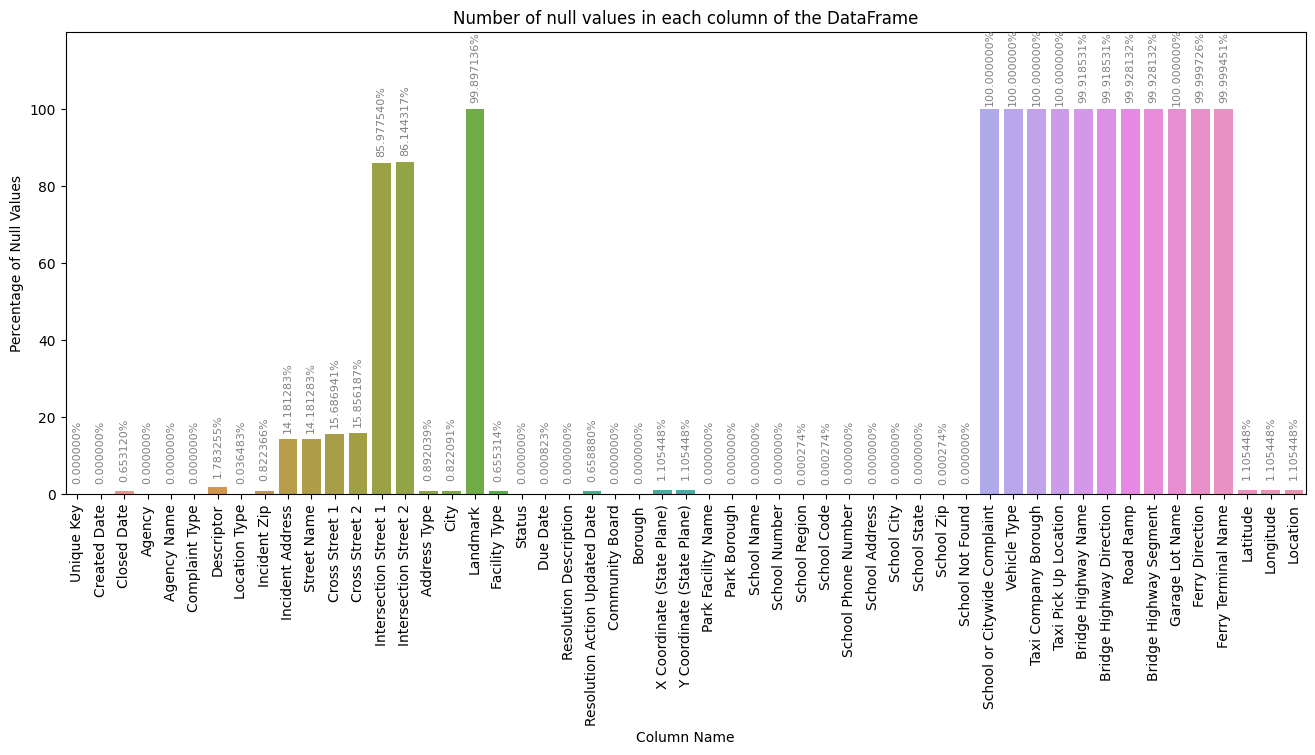

In [20]:
null_dict = {}
row_count = len(dataset)
for column in dataset.columns:
    null_dict[column] = (dataset[column].isna().sum() / row_count) * 100

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=list(null_dict.keys()), y=list(null_dict.values()))
plt.xticks(rotation=90)
ax = plt.gca()
ax.margins(None, 0.199)
plt.xlabel('Column Name')
plt.ylabel('Percentage of Null Values')
title = 'Number of null values in each column of the DataFrame'
plt.title(title)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.6f}%', (p.get_x() + p.get_width() / 2., p.get_height()+9),
                ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                textcoords='offset points', rotation=90)
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()

In [21]:
#2.2 Missing value treatment

In [22]:
#2.2.1 Remove the records whose Closed Date values are null

In [23]:
dataset = dataset.drop(dataset[dataset['Closed Date'].isna()==True].index)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      362177 non-null  int64  
 1   Created Date                    362177 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          362177 non-null  object 
 4   Agency Name                     362177 non-null  object 
 5   Complaint Type                  362177 non-null  object 
 6   Descriptor                      355681 non-null  object 
 7   Location Type                   362047 non-null  object 
 8   Incident Zip                    361502 non-null  float64
 9   Incident Address                310491 non-null  object 
 10  Street Name                     310491 non-null  object 
 11  Cross Street 1                  306846 non-null  object 
 12  Cross Street 2  

In [24]:
#Dropping columns that are more than 50% empty

In [25]:
print(len(list(dataset.columns)))

datanew = dataset
for column in list(dataset.columns) :
    if dataset[column].isna().sum()/len(dataset) > 0.75 :
        datanew.drop(column,axis=1,inplace=True)

del datanew
print(len(list(dataset.columns)),list(dataset.columns))

53
39 ['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type', 'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location']


In [26]:
#2.3 Analyze the date column, and remove entries that have an incorrect timeline

In [27]:
#2.3.1 Calculate the time elapsed in closed and creation date

In [28]:
# Convert 'Created Date' and 'Closed Date' columns to datetime format
dataset['Created Date'] = pd.to_datetime(dataset['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
dataset['Closed Date'] = pd.to_datetime(dataset['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

# Drop entries where 'Created Date' is after 'Closed Date'
dataset = dataset[dataset['Created Date'] <= dataset['Closed Date']]

dataset['Time Elapsed'] = dataset['Closed Date'] - dataset['Created Date']

In [29]:
#2.3.2 Convert the calculated date to seconds to get a better representation

In [30]:
dataset['Time Elapsed'] = dataset['Time Elapsed'].dt.total_seconds()

In [31]:
#2.3.3 View the descriptive statistics for the newly created column

In [32]:
dataset['Time Elapsed'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Time Elapsed, dtype: float64

In [33]:
#2.3.4 Check the number of null values in the Complaint_Type and City columns

In [34]:
print("Number of null values in 'Complaint_Type' column:", dataset['Complaint Type'].isnull().sum())
print("Number of null values in 'City' column:", dataset['City'].isnull().sum())

Number of null values in 'Complaint_Type' column: 0
Number of null values in 'City' column: 674


In [35]:
#2.3.5 Impute the NA value with Unknown City

In [36]:
dataset['City'].fillna(value='Unknown City', inplace=True)
print("Number of null values in 'City' column:", dataset['City'].isnull().sum())

Number of null values in 'City' column: 0


In [37]:
#2.3.6 Draw a frequency plot for the complaints in each city

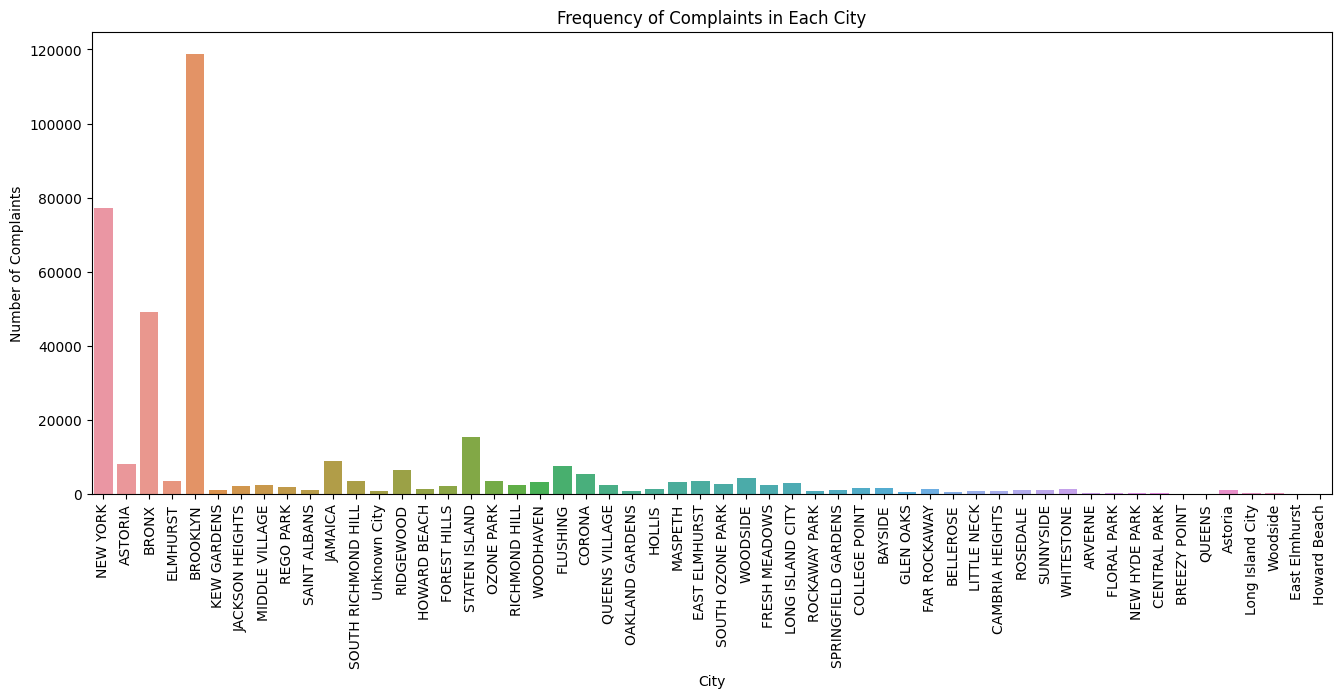

In [38]:
plt.figure(figsize=(16, 6))
sns.countplot(x='City', data=dataset)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of Complaints')
title = 'Frequency of Complaints in Each City'
plt.title(title)
plt.savefig(os.path.join(graph_dir,title+'.png'),bbox_inches='tight')
plt.show()
plt.close()

In [39]:
#2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

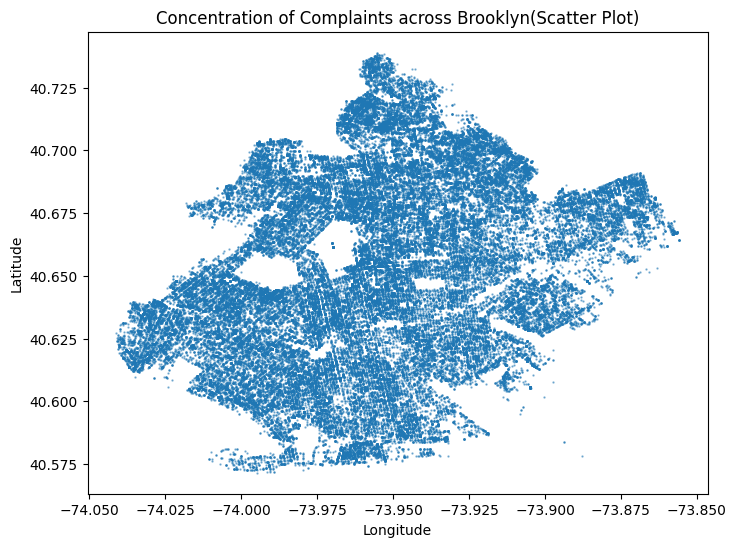

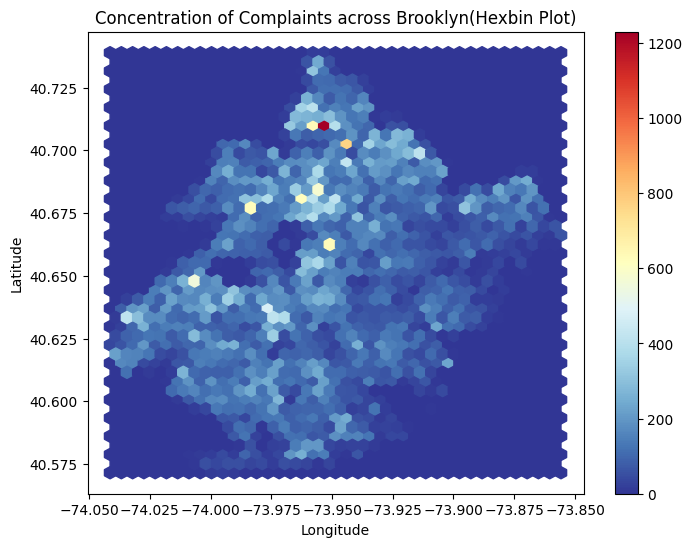

In [40]:
# Filter the dataset to keep only the Brooklyn borough
brooklyn_data = dataset[dataset['Borough'] == 'BROOKLYN']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(brooklyn_data['Longitude'], brooklyn_data['Latitude'], s=0.5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
title = 'Concentration of Complaints across Brooklyn(Scatter Plot)'
plt.title(title)
plt.savefig(os.path.join(graph_dir,title+'.png'),bbox_inches='tight')
plt.show()
plt.close()

# Create a hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(brooklyn_data['Longitude'], brooklyn_data['Latitude'], gridsize=40, cmap='RdYlBu_r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
title = 'Concentration of Complaints across Brooklyn(Hexbin Plot)'
plt.title(title)
plt.colorbar()
plt.savefig(os.path.join(graph_dir,title+'.png'),bbox_inches='tight')
plt.show()
plt.close()

In [41]:
#3. Find major types of complaints:

In [42]:
#3.1 Plot a bar graph to show the types of complaints

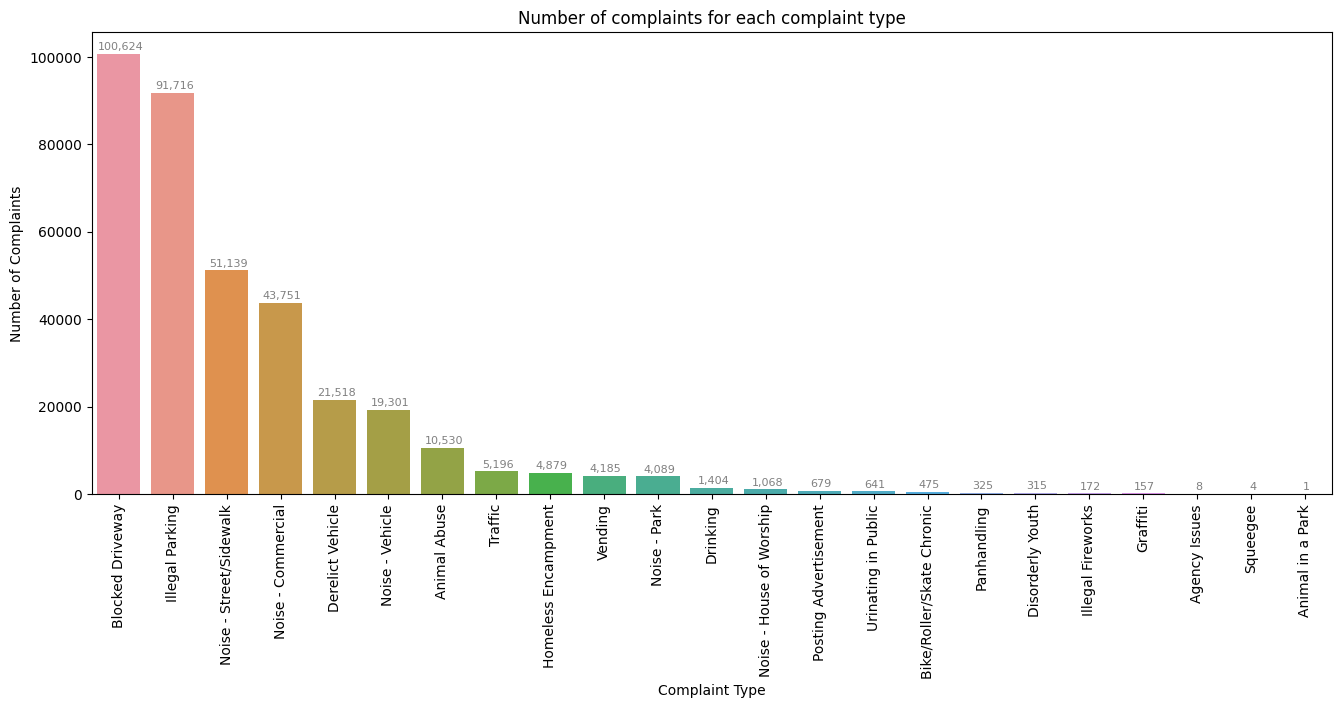

In [43]:
complaint_counts = dataset.groupby('Complaint Type')['Unique Key'].count().sort_values(ascending=False)
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=complaint_counts.index, y=complaint_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
title = 'Number of complaints for each complaint type'
plt.title(title)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2. +0.03, p.get_height()),
                ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()
plt.close()

In [44]:
#3.2 Check the frequency of various types of complaints for New York City

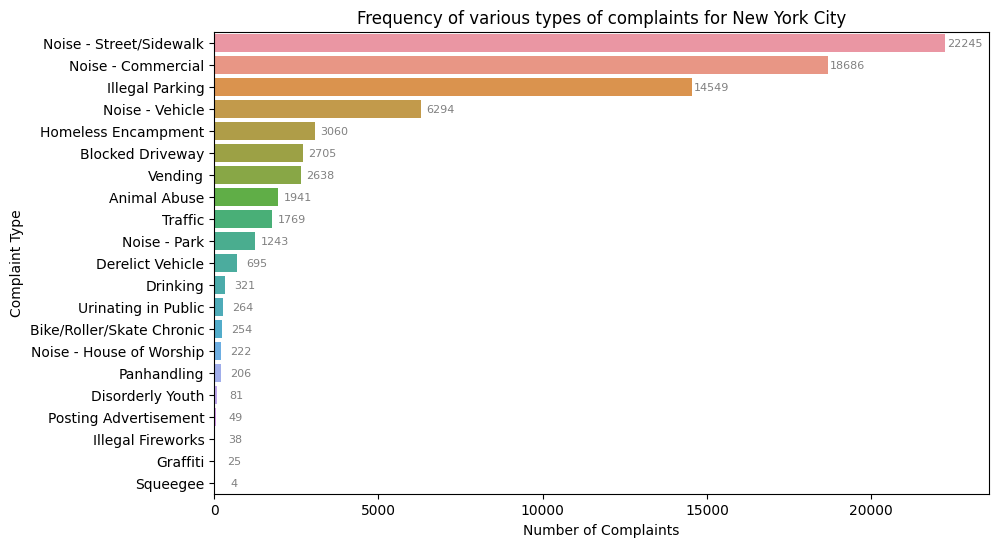

In [45]:
nyc_data = dataset[dataset['City'] == 'NEW YORK']

plt.figure(figsize=(10, 6))
complaint_freq = nyc_data['Complaint Type'].value_counts()
ax = sns.barplot(y=complaint_freq.index, x=complaint_freq.values)
#plt.yticks(rotation=90)
ax = plt.gca()
ax.margins(0.06, None)
plt.ylabel('Complaint Type')
plt.xlabel('Number of Complaints')
title = 'Frequency of various types of complaints for New York City'
plt.title(title)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 600, p.get_y() + p.get_height() / 2. +0.35), ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5), textcoords='offset points', rotation=0)
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()

In [46]:
#3.3 Find the top 10 complaint types

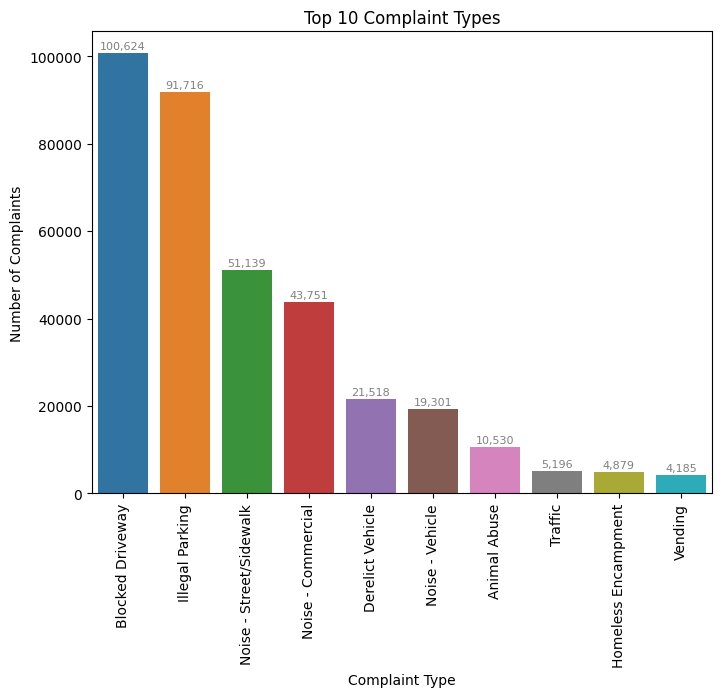

In [47]:
top_10_complaints = dataset['Complaint Type'].value_counts().nlargest(10)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_10_complaints.index, y=top_10_complaints.values)
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
title = 'Top 10 Complaint Types'
plt.title(title)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()+6),
                ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
plt.show()
plt.close()

In [48]:
#3.4 Display the various types of complaints in each city

C:\Users\kanai\AppData\Local\Temp\ipykernel_19668\3667492604.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  top_complaints_by_city = top_complaints_by_city.pivot('City', 'Complaint Type', 'Unique Key').fillna(0)


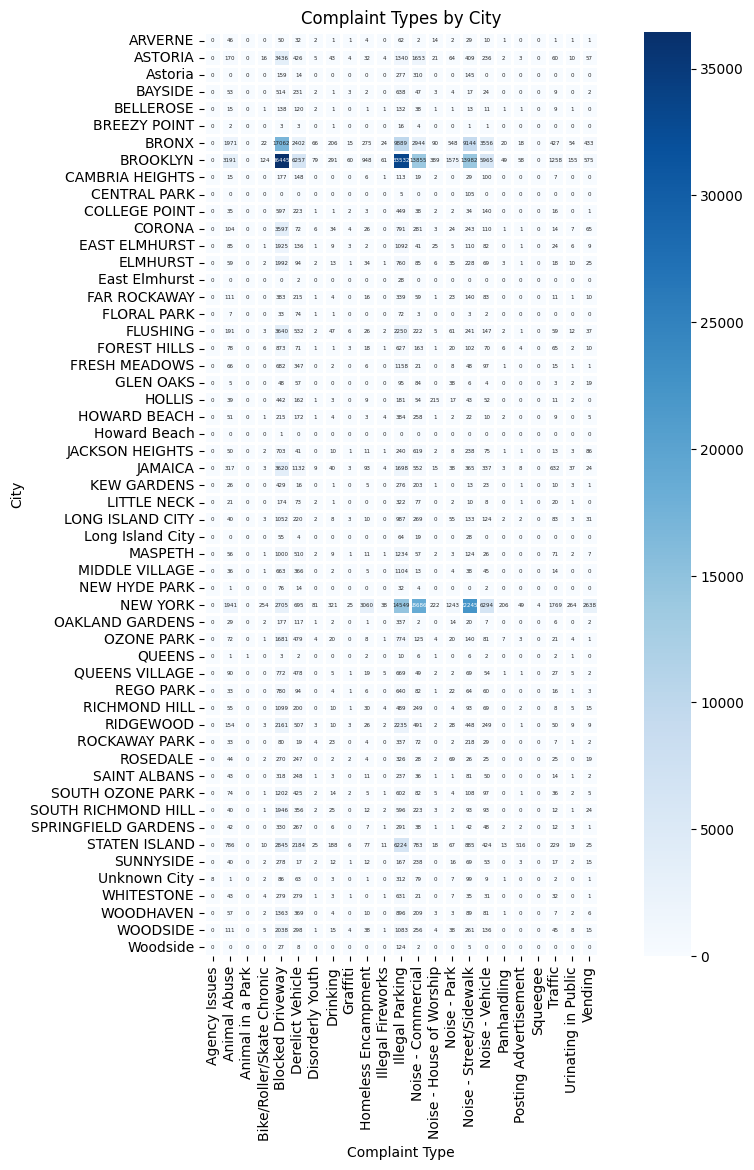

In [49]:
top_complaints_by_city = dataset.groupby(['City', 'Complaint Type'])['Unique Key'].nunique().reset_index()
top_complaints_by_city = top_complaints_by_city.pivot('City', 'Complaint Type', 'Unique Key').fillna(0)

plt.figure(figsize=(12, 12))
sns.heatmap(top_complaints_by_city, cmap='Blues', annot=True, fmt='.0f', square=True, annot_kws={"size": 4}, linewidths=1)
plt.xlabel('Complaint Type')
plt.ylabel('City')
title = 'Complaint Types by City'
plt.title(title)
plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
plt.show()
plt.close()

In [50]:
#3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [51]:
df_new = pd.pivot_table(data=dataset, values='Unique Key', index='Complaint Type', columns='City', aggfunc='count', fill_value=0)
df_new.info()
df_new.shape

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Agency Issues to Vending
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ARVERNE              23 non-null     int64
 1   ASTORIA              23 non-null     int64
 2   Astoria              23 non-null     int64
 3   BAYSIDE              23 non-null     int64
 4   BELLEROSE            23 non-null     int64
 5   BREEZY POINT         23 non-null     int64
 6   BRONX                23 non-null     int64
 7   BROOKLYN             23 non-null     int64
 8   CAMBRIA HEIGHTS      23 non-null     int64
 9   CENTRAL PARK         23 non-null     int64
 10  COLLEGE POINT        23 non-null     int64
 11  CORONA               23 non-null     int64
 12  EAST ELMHURST        23 non-null     int64
 13  ELMHURST             23 non-null     int64
 14  East Elmhurst        23 non-null     int64
 15  FAR ROCKAWAY         23 non-null     int64
 16  FLORAL PARK     

(23, 54)

In [52]:
#4. Visualize the major types of complaints in each city

In [53]:
#4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

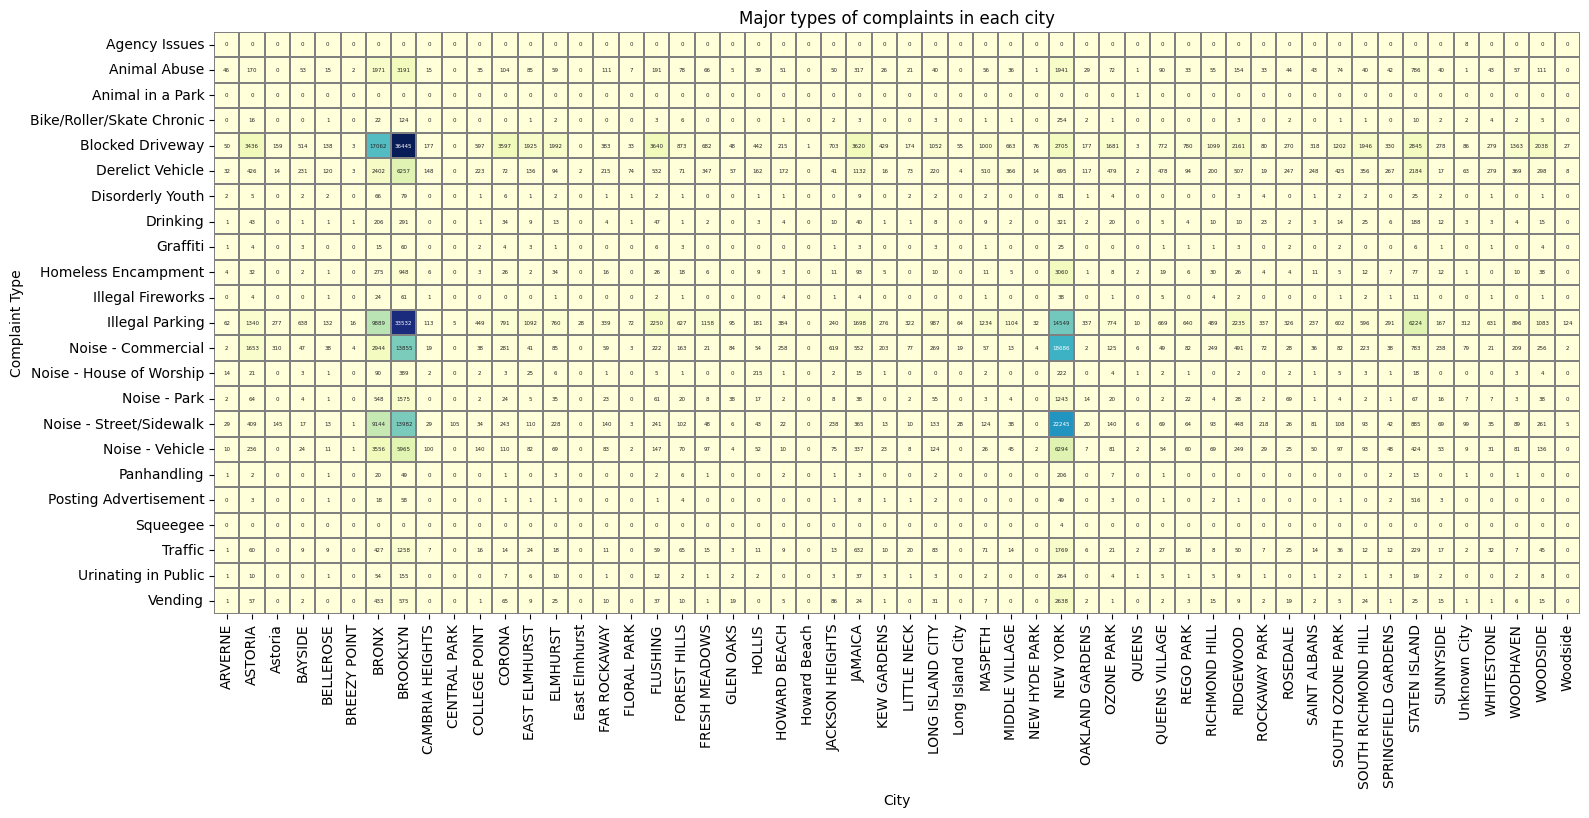

In [54]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_new, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.2, linecolor='gray', square=True, annot_kws={"size": 4}, cbar=False)
plt.xlabel('City')
plt.ylabel('Complaint Type')
title = 'Major types of complaints in each city'
plt.title(title)
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()
plt.close()

In [55]:
#4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

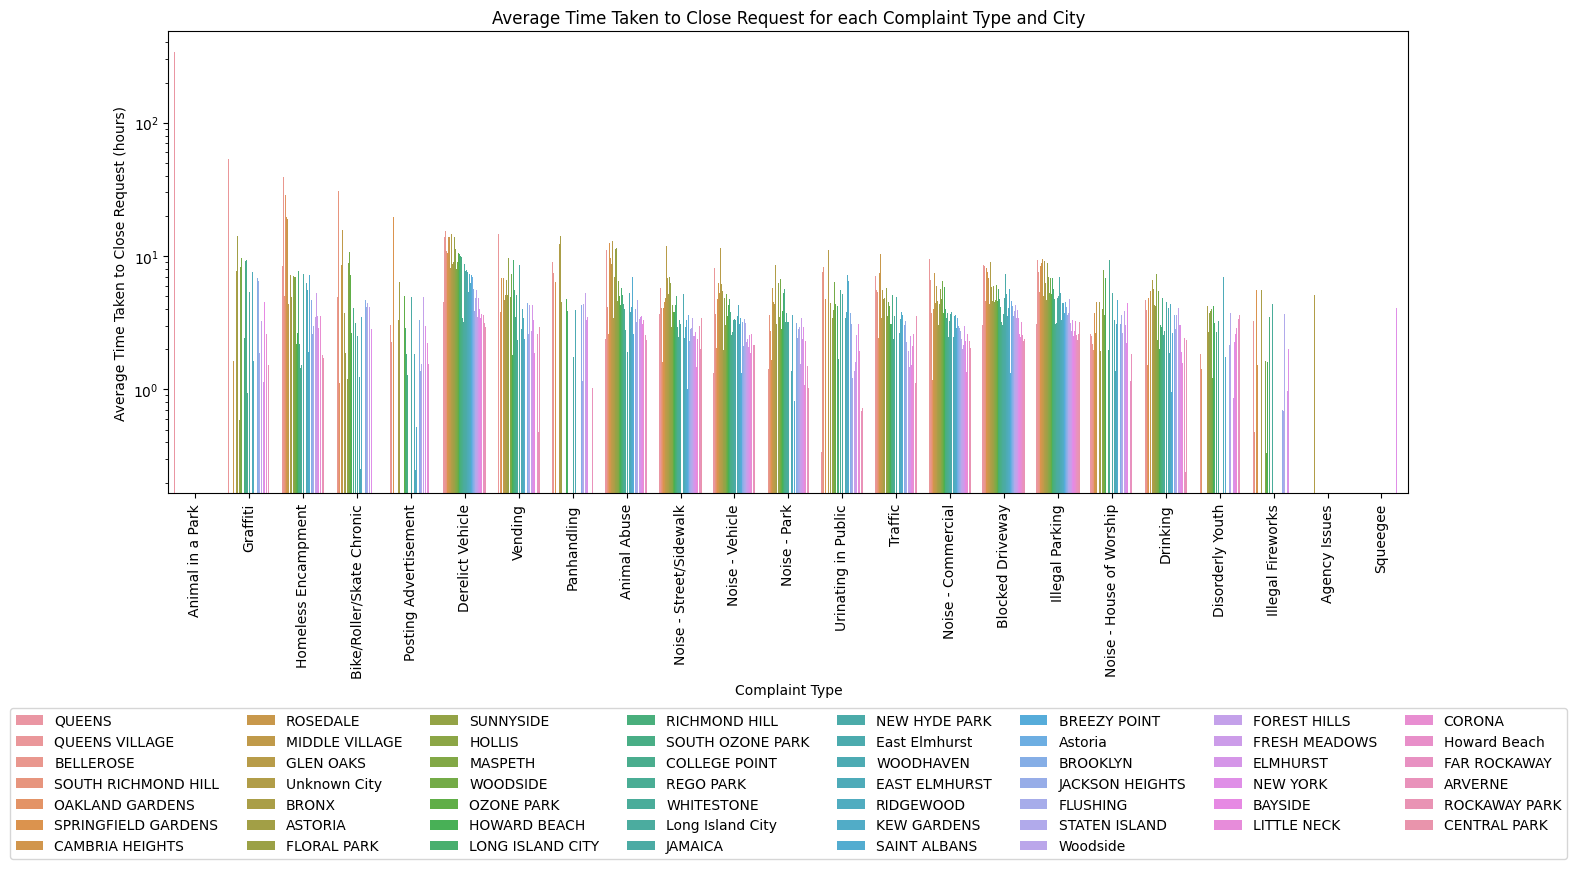

In [56]:
dataset['Time Elapsed (hours)'] = dataset['Time Elapsed'] / 3600

df_grouped = dataset.groupby(['Complaint Type', 'City']).agg({'Time Elapsed (hours)': 'mean'}).reset_index()

df_sorted = df_grouped.sort_values(by='Time Elapsed (hours)', ascending=False)

# plot the data as a grouped bar chart
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='Complaint Type', y='Time Elapsed (hours)', hue='City', data=df_sorted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Complaint Type')
plt.ylabel('Average Time Taken to Close Request (hours)')
title = 'Average Time Taken to Close Request for each Complaint Type and City'
plt.title(title)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45), ncol=8)
legend.get_frame().set_facecolor('white')
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight', bbox_extra_artists=[legend])
plt.show()
plt.close()

In [57]:
#5. See whether the average response time across different complaint types is similar (overall)

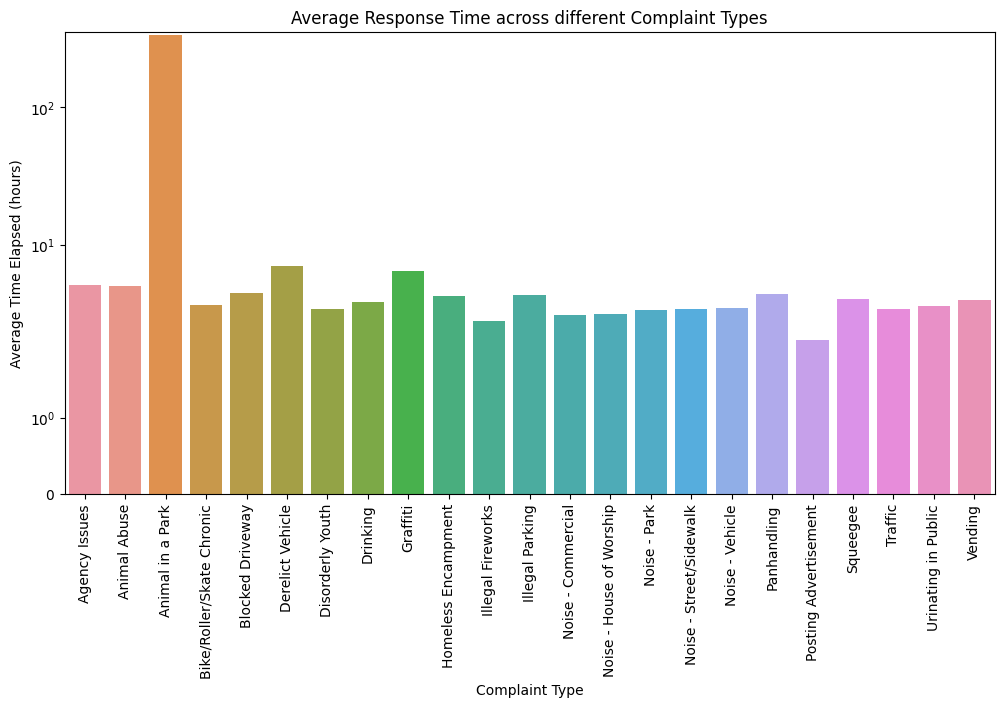

In [58]:
# group data by complaint type and calculate the average response time
df_grouped = dataset.groupby(['Complaint Type']).agg({'Time Elapsed (hours)': 'mean'}).reset_index()

# plot the data as a boxplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Complaint Type', y='Time Elapsed (hours)', data=df_grouped)
plt.xticks(rotation=90)
plt.yscale('symlog')
plt.xlabel('Complaint Type')
plt.ylabel('Average Time Elapsed (hours)')
title = 'Average Response Time across different Complaint Types'
plt.title(title)
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()
plt.close()

In [59]:
#5.1 Visualize the average of Request_Closing_Time

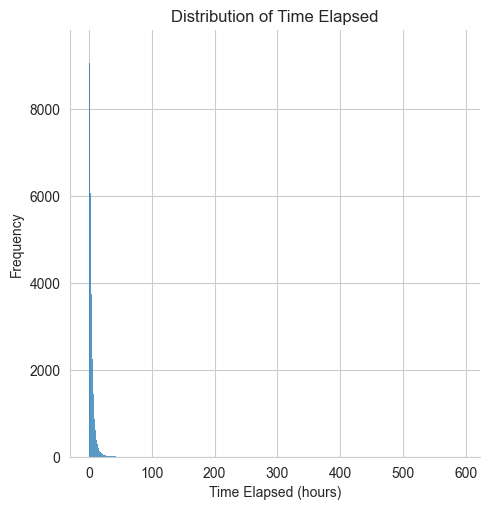

In [60]:
sns.set_style('whitegrid')
sns.displot(dataset['Time Elapsed (hours)'], kde=False)

plt.xlabel('Time Elapsed (hours)')
plt.ylabel('Frequency')
title = 'Distribution of Time Elapsed'
plt.title(title)
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()
plt.close()

In [61]:
df = dataset[['Complaint Type', 'Location Type', 'Incident Zip', 'Borough', 'Time Elapsed (hours)']].copy()

df = pd.get_dummies(df, columns=['Complaint Type', 'Location Type', 'Borough'])

df = sm.add_constant(df)

df[~np.isfinite(df)] = 1e6

model = sm.OLS(df['Time Elapsed (hours)'], df.drop(['Time Elapsed (hours)'], axis=1)).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Time Elapsed (hours)   R-squared:                       0.052
Model:                              OLS   Adj. R-squared:                  0.052
Method:                   Least Squares   F-statistic:                     462.0
Date:                  Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                          02:08:15   Log-Likelihood:            -1.1447e+06
No. Observations:                362177   AIC:                         2.290e+06
Df Residuals:                    362133   BIC:                         2.290e+06
Df Model:                            43                                         
Covariance Type:              nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [62]:
#7. Perform a Kruskal-Wallis H test

In [63]:
df_subset = dataset[['Complaint Type', 'Time Elapsed']]

data = {}
for comp_type in df_subset['Complaint Type'].unique():
    data[comp_type] = df_subset[df_subset['Complaint Type'] == comp_type]['Time Elapsed'].values

test_stat, p_value = kruskal(*data.values())

print('Kruskal-Wallis H test:')
print(f'Test statistic: {test_stat:.4f}')
print(f'p-value: {p_value:.4f}')

Kruskal-Wallis H test:
Test statistic: 11988.2694
p-value: 0.0000


In [64]:
#7.1 Fail to reject H0: All sample distributions are equal
#7.2 Reject H0: One or more sample distributions are not equal

In [65]:
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: All sample distributions are equal")
else:
    print("Reject the null hypothesis: At least one sample distribution is different")

Reject the null hypothesis: At least one sample distribution is different
